In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Tidal_range_Dataset_2025.csv')


### Part 1a: Environmental Data and Tidal Resource

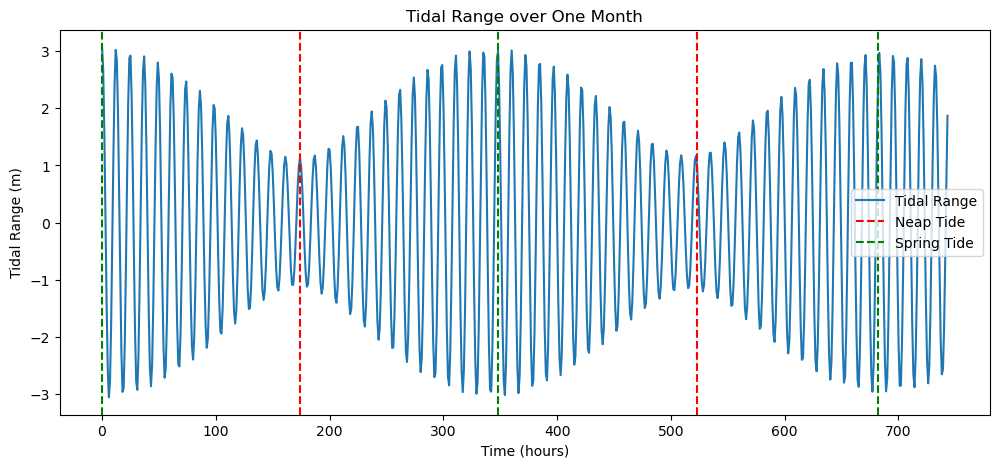

In [24]:
Fzu = 0
M2 = 2.0910
S2 = 0.5610
K2 = 0.4182
spring = 5.2
neap = 3

T_M2 = 12.42
T_S2 = 12
T_K2 = 11.97


t = np.linspace(0, 365*24, 365*24)
v = M2 * np.cos((2*np.pi/ T_M2) * t) + S2 * np.cos((2*np.pi/ T_S2) * t) + K2 * np.cos((2*np.pi/ T_K2) * t) + Fzu


plt.figure(figsize=(12,5))
plt.plot(t[:31*24], v[:31*24], label='Tidal Range')
plt.xlabel('Time (hours)')
plt.ylabel('Tidal Range (m)')
plt.title('Tidal Range over One Month')

plt.axvline(x=174, color='r', linestyle='--', label='Neap Tide')
plt.axvline(x=523, color='r', linestyle='--')

plt.axvline(x=348, color='g', linestyle='--', label='Spring Tide')
plt.axvline(x=682, color='g', linestyle='--')
plt.axvline(x=0, color='g', linestyle='--')

plt.legend()


